In [1]:
import pyodbc as odbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
DRIVER = "SQL SERVER"
SERVER = "server_name"
DB = "database_name"

connection = f"""
DRIVER={{{DRIVER}}};
SERVER={SERVER};
DATABASE={DB};
Trust_Connection=yes"""

conn = odbc.connect(connection)

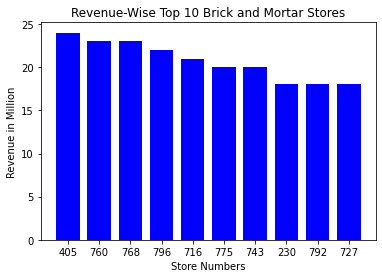

In [12]:
query_top10_offline_byrevenue = """SELECT TOP 10 t.store, round(SUM(TRAN_AMT)/1000000,0) AS revenue
FROM TRANSACT T
WHERE t.store <> 698
GROUP BY t.store
ORDER BY SUM(TRAN_AMT) DESC"""

top10_byrevenue_offline = pd.read_sql(query_top10_offline_byrevenue, conn)

top10_byrevenue_offline.store = top10_byrevenue_offline.store.astype(str)

# Initialize the lists for X and Y
X = list(top10_byrevenue_offline.iloc[:, 0])
Y = list(top10_byrevenue_offline.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, width = 0.75, color='blue')
plt.title("Revenue-Wise Top 10 Brick and Mortar Stores")
plt.xlabel("Store Numbers")
plt.ylabel("Revenue in Million")


# Show the plot
plt.show()

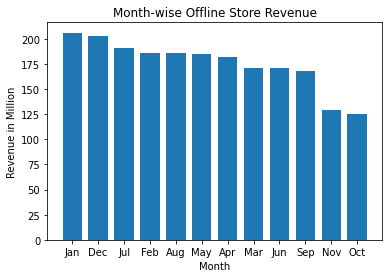

In [5]:
query_revenue_monthly_offline = """SELECT SUBSTRING(datename(month, TRAN_DATE),1,3) AS MONTH, round(SUM(TRAN_AMT)/1000000,0) AS Revenue
FROM TRANSACT T
WHERE t.store <> '698'
GROUP BY datename(month, TRAN_DATE)--MONTH(TRAN_DATE), tran_date
ORDER BY SUM(TRAN_AMT) DESC"""

revenue_monthly_offline = pd.read_sql(query_revenue_monthly_offline, conn)

# Initialize the lists for X and Y
X = list(revenue_monthly_offline.iloc[:, 0])
Y = list(revenue_monthly_offline.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, width = 0.75)
plt.title("Month-wise Offline Store Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue in Million")


# Show the plot
plt.show()

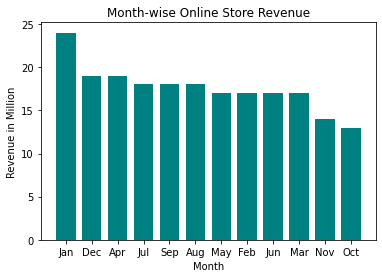

In [6]:
query_revenue_monthly_online = """SELECT SUBSTRING(datename(month, TRAN_DATE),1,3) AS MONTH, round(SUM(TRAN_AMT)/1000000,0) AS Revenue
FROM TRANSACT T
WHERE t.store = '698'
GROUP BY datename(month, TRAN_DATE)--MONTH(TRAN_DATE), tran_date
ORDER BY SUM(TRAN_AMT) DESC"""

revenue_monthly_online = pd.read_sql(query_revenue_monthly_online, conn)

# Initialize the lists for X and Y
X = list(revenue_monthly_online.iloc[:, 0])
Y = list(revenue_monthly_online.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, width = 0.75, color='teal')
plt.title("Month-wise Online Store Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue in Million")


# Show the plot
plt.show()

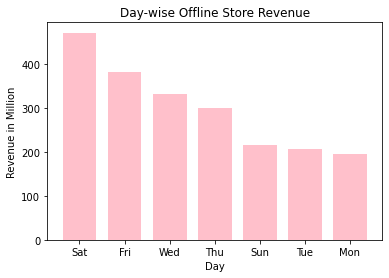

In [7]:
query_revenue_daily_offline = """SELECT SUBSTRING(datename(weekday, TRAN_DATE),1,3) AS MONTH, round(SUM(TRAN_AMT)/1000000,0) AS Revenue
FROM TRANSACT T
WHERE t.store <> '698'
GROUP BY datename(weekday, TRAN_DATE)--MONTH(TRAN_DATE), tran_date
ORDER BY SUM(TRAN_AMT) DESC"""

revenue_daily_offline = pd.read_sql(query_revenue_daily_offline, conn)

# Initialize the lists for X and Y
X = list(revenue_daily_offline.iloc[:, 0])
Y = list(revenue_daily_offline.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, width = 0.75, color='pink')
plt.title("Day-wise Offline Store Revenue")
plt.xlabel("Day")
plt.ylabel("Revenue in Million")


# Show the plot
plt.show()

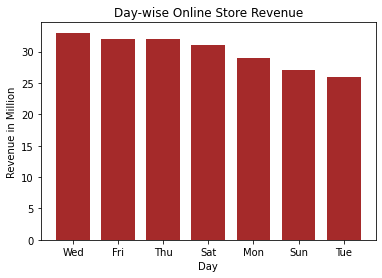

In [8]:
query_revenue_daily_online = """SELECT SUBSTRING(datename(weekday, TRAN_DATE),1,3) AS MONTH, round(SUM(TRAN_AMT)/1000000,0) AS Revenue
FROM TRANSACT T
WHERE t.store = '698'
GROUP BY datename(weekday, TRAN_DATE)--MONTH(TRAN_DATE), tran_date
ORDER BY SUM(TRAN_AMT) DESC"""

revenue_daily_online = pd.read_sql(query_revenue_daily_online, conn)

# Initialize the lists for X and Y
X = list(revenue_daily_online.iloc[:, 0])
Y = list(revenue_daily_online.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, width = 0.75, color='brown')
plt.title("Day-wise Online Store Revenue")
plt.xlabel("Day")
plt.ylabel("Revenue in Million")


# Show the plot
plt.show()

[[1.         0.36510882]
 [0.36510882 1.        ]]


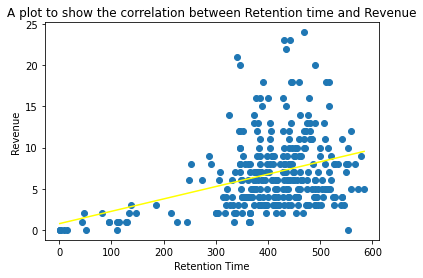

In [9]:
query_revenue_retention = """SELECT x.store, sum(x.Avg_retention_time) AS retention_time,  round(sum(x.Store_Revenue_Year)/1000000,0) AS Revenue
FROM(
    SELECT a.store, year(start_date) AS Year, avg(a.cust_retention_time) AS Avg_retention_time, sum(a.Cust_TransAmt) AS Store_Revenue_Year
    FROM
            (SELECT s.store, c.cust_id, min(tran_date) As start_date, max(tran_date) AS end_date, DATEDIFF(day, min(tran_date), max(tran_date)) AS cust_retention_time, sum(tran_amt) AS Cust_TransAmt
            FROM store s JOIN transact t
            ON s.store = t.store JOIN customer c
            ON  t.cust_id = c.cust_id
            GROUP BY s.store, c.cust_id) a
    GROUP BY a.store, year(start_date))x
WHERE x.store <> '698'
GROUP BY x.store
ORDER BY 2"""

revenue_retention = pd.read_sql(query_revenue_retention, conn)

revenue_retention.store = revenue_retention.store.astype(str)

#correlation between revenue and retention - top 10

x = revenue_retention['retention_time']
y = revenue_retention['Revenue']

print(np.corrcoef(x, y))


#plt.scatter(x, y)
plt.scatter(x, y, label=f'y Correlation = {np.round(np.corrcoef(x,y)[0,1], 2)}')
#plt.bar(x, y, color='g', width = 0.4)
plt.title('A plot to show the correlation between Retention time and Revenue')
plt.xlabel('Retention Time')
plt.ylabel('Revenue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')


plt.show()

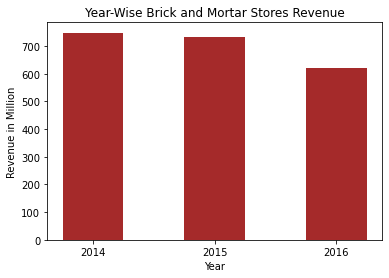

In [10]:
query_offline_store_revenue = """SELECT YEAR(t.TRAN_DATE) AS Tran_Year, round(SUM(TRAN_AMT)/1000000,0) AS store_revenue, 'Offline' AS Store_Type
FROM TRANSACT T
WHERE t.store <> 698
GROUP BY YEAR(t.TRAN_DATE)"""

offline_store_revenue = pd.read_sql(query_offline_store_revenue, conn)

offline_store_revenue.Tran_Year = offline_store_revenue.Tran_Year.astype(str)

# Initialize the lists for X and Y
X = list(offline_store_revenue.iloc[:, 0])
Y = list(offline_store_revenue.iloc[:, 1])

plt.bar(X, Y, width = 0.5, color='brown')
plt.title("Year-Wise Brick and Mortar Stores Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue in Million")

# Show the plot
plt.show()

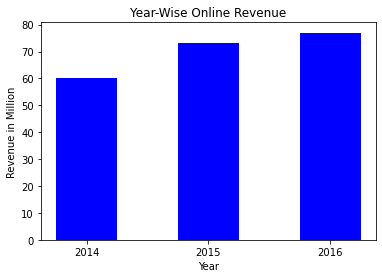

In [11]:
query_online_store_revenue = """SELECT YEAR(t.TRAN_DATE) AS Tran_Year, round(SUM(TRAN_AMT)/1000000,0) AS store_revenue, 'Online' AS Store_Type
FROM TRANSACT T
WHERE t.store = 698
GROUP BY YEAR(t.TRAN_DATE)"""

online_store_revenue = pd.read_sql(query_online_store_revenue, conn)

online_store_revenue.Tran_Year = online_store_revenue.Tran_Year.astype(str)

# Initialize the lists for X and Y
X = list(online_store_revenue.iloc[:, 0])
Y = list(online_store_revenue.iloc[:, 1])

plt.bar(X, Y, width = 0.5, color='Blue')
plt.title("Year-Wise Online Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue in Million")

# Show the plot
plt.show()